In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns

In [2]:
df=pd.read_csv('brain_stroke.csv')

In [3]:
df.isnull().any()

gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                  False
smoking_status       False
stroke               False
dtype: bool

In [4]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [5]:
from sklearn.preprocessing import LabelEncoder
LEncode=LabelEncoder()
df.gender=LEncode.fit_transform(df['gender'])

In [6]:
df.ever_married=LEncode.fit_transform(df['ever_married'])

In [7]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
1,1,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
2,0,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
3,0,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1
4,1,81.0,0,0,1,Private,Urban,186.21,29.0,formerly smoked,1


In [8]:
df.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [9]:
for col in df.columns:
    if df[col].dtype==np.number:
        continue
    else:
        df[col]=LEncode.fit_transform(df[col])

In [10]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2,1
2,0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,0,79.0,1,0,1,2,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,1,186.21,29.0,1,1


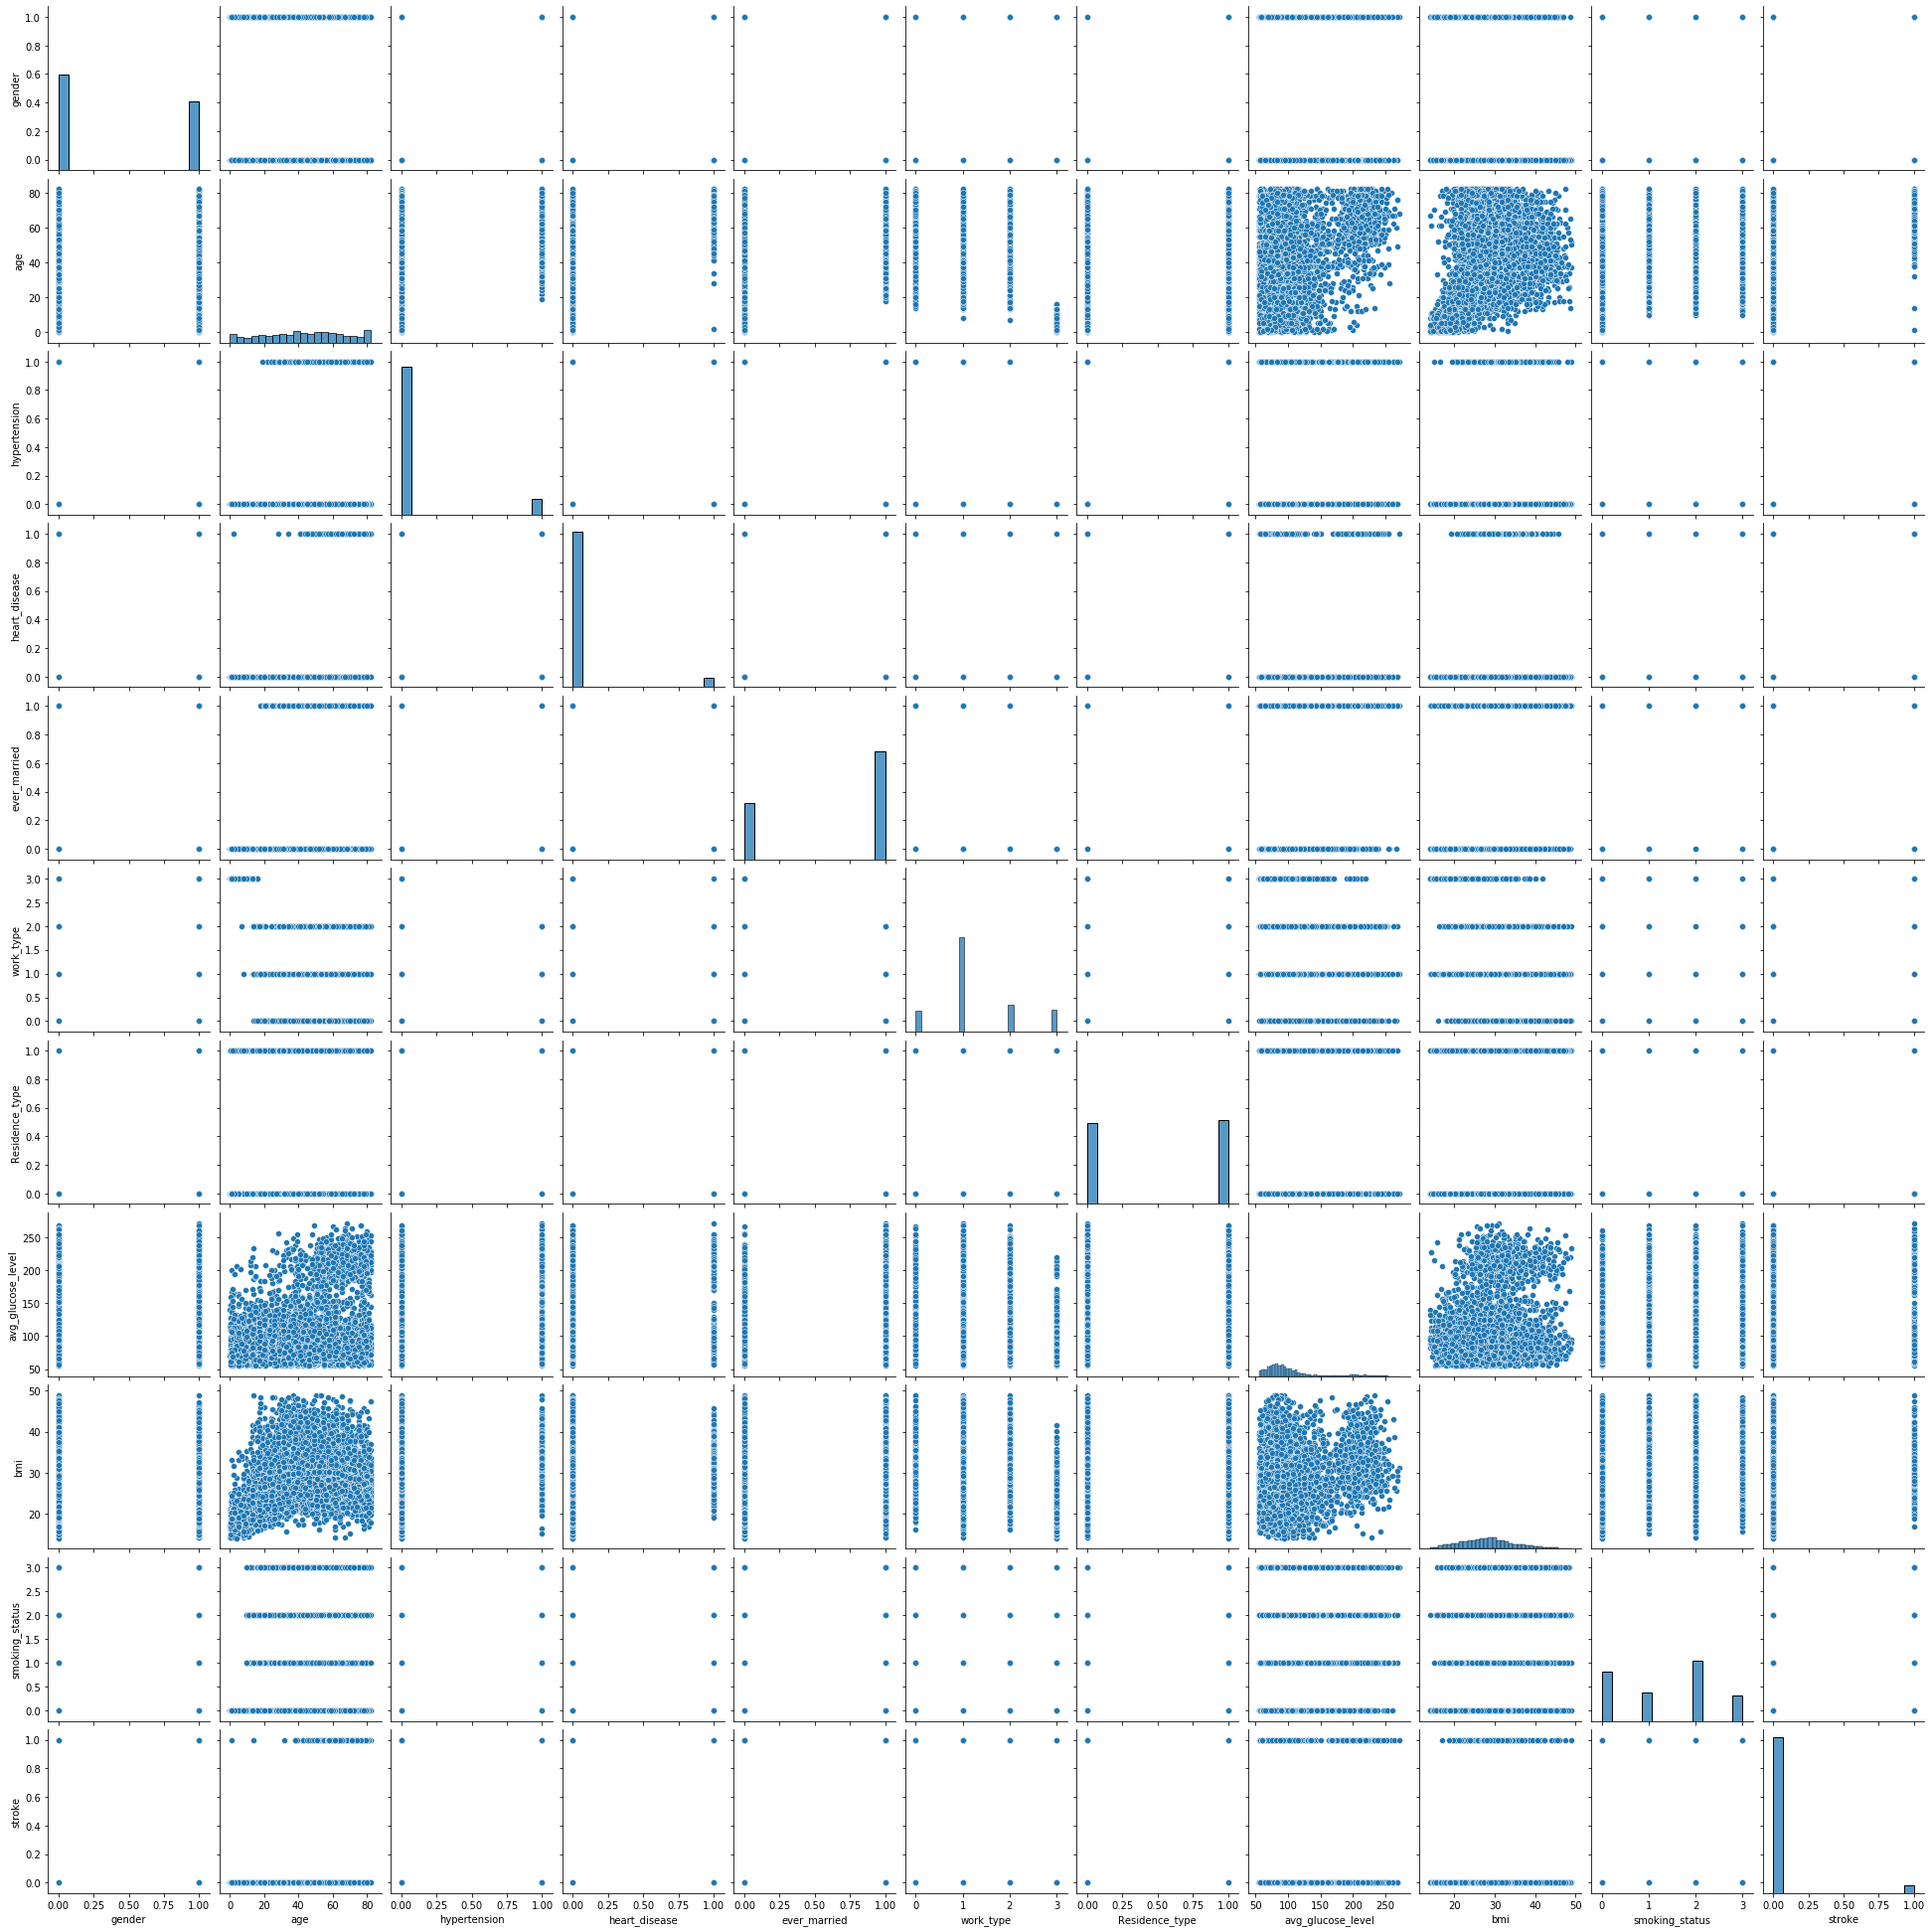

In [11]:
sns.pairplot(df[['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status','stroke']])

In [12]:
df.shape

(4981, 11)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x=df.drop('stroke',axis=1)
y=df['stroke']

In [15]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.20,random_state=45)

# MultinominalNB

In [16]:
from sklearn.naive_bayes import MultinomialNB 

In [17]:
mnb=MultinomialNB()
mnb.fit(xtrain,ytrain)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [18]:
mnb.score(xtest,ytest)

0.7923771313941825

# GaussianNB

In [19]:
from sklearn.naive_bayes import GaussianNB 

In [20]:
gnb=GaussianNB()
gnb.fit(xtrain,ytrain)
gnb.score(xtest,ytest)

0.8585757271815446

# Random forest classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier(n_estimators=100)
RFC.fit(xtrain,ytrain)
RFC.score(xtest,ytest)

0.954864593781344

In [22]:
ytest

4369    0
3839    0
2539    0
265     0
3872    0
       ..
1485    0
2446    0
1617    0
511     0
1856    0
Name: stroke, Length: 997, dtype: int64